In [2]:
%pylab inline
from scipy import special


Populating the interactive namespace from numpy and matplotlib


In [19]:
special.gamma(3.2)

2.4239654799353687

In [102]:
def xi_transformation(r):
    return (r-1)/(r+1)

def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def phi_nl(n, l, r):
    xi = xi_transformation(r)
    return - special.eval_gegenbauer(n, 2*l + 3/2., xi)* (4*np.pi)**(0.5)*r**l / ((1+r)**(2*l+1))  

In [207]:
def snl(n, l, m, m_p, r_p, theta_p, phi_p):
    A_nl = Anl(n,l)
    if m==0:
        S_nl = A_nl * np.sum(m_p*phi_nl(n, l, r_p)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
        print(np.sum(phi_nl(n, l, r_p)), np.sum(special.sph_harm(m, l, 0, theta_p)), A_nl)
    if m!=0:
        S_nl = 2*A_nl * np.sum(m_p*phi_nl(n, l, r_p)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
    return S_nl.real

In [24]:
# data:
spherical_halo = genfromtxt('../data/spherical_halo.txt')

In [25]:
x = spherical_halo[:,0]
y = spherical_halo[:,1]
z = spherical_halo[:,2]
m = spherical_halo[:,0]

In [27]:
r = (x**2 + y**2 + z**2)**0.5
theta = np.arccos(z/r)
phi = np.arctan2(y, x)


In [113]:
snl(15, 10, 0, m, r, theta, phi)

-0.22940403948796989

In [148]:
snl(0, 0, 0, m, r, theta, phi)

1454.3000568725531

In [237]:
snl(0, 20, 0, m, r, theta, phi)

-6.79214484952e-10 (231.601515197+0j) -2.04745181245e+22


-27621229138.56369

In [110]:
import biff

In [181]:
S_biff, T_biff = biff.compute_coeffs_discrete(np.array([x, y, z]).T, m, 15, 20, skip_m=True, r_s=1)

In [183]:
shape(S_biff)

(16, 21, 21)

Text(0,0.5,'$l$')

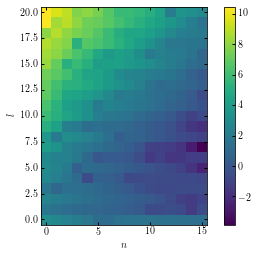

In [194]:
imshow(np.log10(np.abs(S_biff[:,:,0])).T, origin='lower')
colorbar()
xlabel('$n$')
ylabel('$l$')

In [208]:
snl(0, 20, 0, m, r, theta, phi)

-6.79214484952e-10 (231.601515197+0j) -2.04745181245e+22


-27621229138.56369

In [196]:
S_biff[0, 20, 0]

-27621229138.563644

In [197]:
S_biff[:,0,0]

array([ 1454.30005687,   637.29460382,   319.70192035,   159.56661384,
          69.75398434,    16.44550399,   -14.67859021,   -31.00075525,
         -37.84310433,   -39.34739363,   -38.02611498,   -35.03273456,
         -31.24275278,   -27.62161573,   -24.76135415,   -22.69757351])

Text(0.5,0,'$n$')

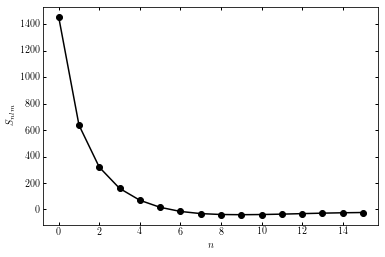

In [209]:
plot(np.arange(0, 16, 1), S_biff[:,0,0], '-o', c='k' )
ylabel('$S_{nlm}$')
xlabel('$n$')

Text(0.5,0,'$l$')

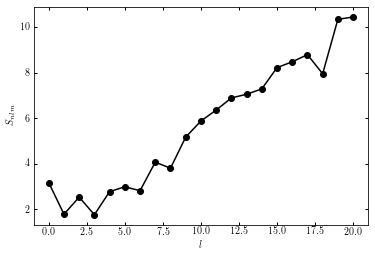

In [214]:
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0])), '-o', c='k' )
ylabel('$S_{nlm}$')
xlabel('$l$')

In [228]:
A_nl_t = np.zeros(20)
for i in range(0, 20):
    A_nl_t[i] = Anl(0, i)

Text(0.5,0,'$l$')

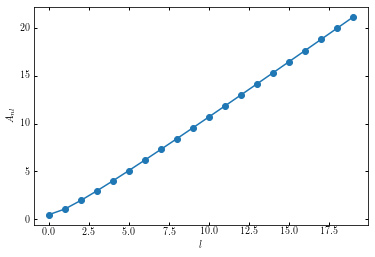

In [235]:
plot(np.arange(0, 20, 1), np.log10(np.abs(A_nl_t)), '-o')
ylabel('$A_{nl}$')
xlabel('$l$')